# Markov state Model example from 1-D 4 well potential

General imports to be able to run the Brownian dynamics simualtion

In [22]:
%pylab inline
import math
import seaborn as sbn

Populating the interactive namespace from numpy and matplotlib


/Users/thomas/.virtualenvs/nlp/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plot', 'std', 'colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [23]:
#pyemma realted imports
#Run `pip install pyemma`, or see: https://github.com/markovmodel/PyEMMA
import pyemma as mm

## BD dynamics for 4 four well model potential

In [24]:
# assymetric double well potential 
def U(x):
    return  4*(0. + 0.2/2.718**(80*(-0.5 + x)**2) + 0.8/2.718**(80*x**2) + 0.5/2.718**(40*(0.5 + x)**2) + x**8)
# gradient of the potential
def G(x):
    return  4*((-32.*(-0.5 + x))/2.718**(80*(-0.5 + x)**2) - (128.*x)/2.718**(80*x**2) + 8*x**7 - (40.*(0.5 + x))/2.718**(40*(0.5 + x)**2))
#Brownian Dynamics simulation
def bd(x0, L, kT_idx = 0, kT = None, f = None):
    dt = 0.005
    mass = 1
    damping = 1
    beta = 1.0/kT[kT_idx]
    coeff_A = dt / ( mass * damping )
    coeff_B = np.sqrt( 2.0 * dt / ( beta * mass * damping ) )
    x = x0
    P = [x0]
    for t in range(L):
        g = G(x)
        x = x - coeff_A * g + coeff_B * np.random.normal()
        #while math.isnan(x):
        #while (x<-1.05 or x>1.05):
        #    x = P[-1] - coeff_A * g + coeff_B * np.random.normal()
        P.append( x )
    return (np.array(P, dtype=np.float64))

# discretisation scheme
def discretise( T, centers ):
    D = np.zeros( shape=T.shape, dtype=np.int32 )
    for i in range( T.shape[0] ):
        if T[i] <= centers[0]:
            D[i] = 0
        elif T[i] >= centers[-1]:
            D[i] = centers.shape[0]-1
        else:
            for j in range( centers.shape[0] ):
                if T[i] < centers[j]+0.01:
                    D[i] = j
                    break
    return D
# generate trajectories
def get_trajectories( centers, L, kT_idx=0, kT = None ,f=None):
    #run the Brownian dynamics integrator
    traj= bd( -0.5, L , kT_idx = kT_idx, kT= kT, f=f)
    dtraj = discretise( traj, centers ) #discretise the trajectory into the defined bins
    return traj, dtraj




In [25]:
# set the discretisation and simulation parameters
# kT array
TEMPS = np.array( [1] )
# factor used to make sure temperatures are roughly sampled equally
#definition of the binning
NBINS = 100
centers = np.linspace(-1.0,1.0,NBINS)
L = 1000000 #trajectoy length 
# run the simulations
traj, dtrajs = get_trajectories( centers, L, kT_idx=0, kT=TEMPS )

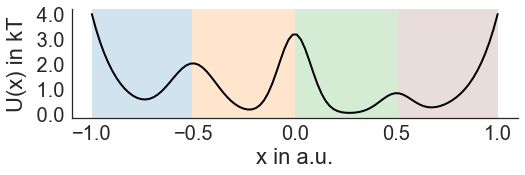

In [26]:
#potential
u= []
colors = sbn.color_palette()
sbn.set_style("white")
sbn.set_context("notebook", font_scale=2)
for x in centers:
    u.append(U(x))
fig = figure(figsize=(8, 2))
plot = fig.add_subplot(111)
plt.plot(centers,u,'-', color = 'k', linewidth=2)
halfwidth = (centers[1]-centers[0])/2.0
plt.axvspan(centers[0], centers[24]+halfwidth, facecolor=colors[0], alpha=0.2)
plt.axvspan(centers[24]+halfwidth, centers[49]+halfwidth, facecolor=colors[1], alpha=0.2)
plt.axvspan(centers[49]+halfwidth, centers[74]+halfwidth, facecolor=colors[2], alpha=0.2)
plt.axvspan(centers[74]+halfwidth, centers[-1], facecolor=colors[5], alpha=0.2)
labels = ['0', '25', '50', '75', '100']
plt.xlabel('x in a.u.')
plt.ylabel('U(x) in kT')
plt.yticks(np.linspace(0.0,4.0,5))
xx, locs = plt.yticks()
ll = [' %.1f' % a for a in xx]
plt.yticks(xx, ll)
#plt.xticks(labels, rotation='vertical')
plot.tick_params(axis='both', which='major')
#plt.savefig('Fig1A.pdf')
sbn.despine()

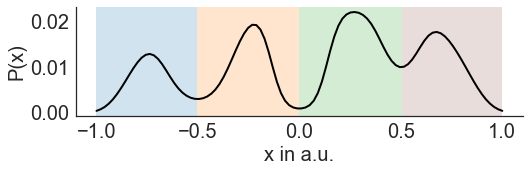

In [27]:
#stationary distribution
p= []
def integ(x, kt):
    return np.exp(- U(x)/kt)
for x in centers:
    p.append(integ(x,1.0))
p = np.array(p)
p = p/p.sum()
fig = figure(figsize=(8, 2))
plot = fig.add_subplot(111)
plt.plot(centers,p, color = 'k', linewidth=2)
plt.xlabel('x in a.u.', fontsize=20)
plt.ylabel('P(x)', fontsize=20)
plt.axvspan(centers[0], centers[24]+halfwidth, facecolor=colors[0], alpha=0.2)
plt.axvspan(centers[24]+halfwidth, centers[49]+halfwidth, facecolor=colors[1], alpha=0.2)
plt.axvspan(centers[49]+halfwidth, centers[74]+halfwidth, facecolor=colors[2], alpha=0.2)
plt.axvspan(centers[74]+halfwidth, centers[-1], facecolor=colors[5], alpha=0.2)
plt.yticks(np.linspace(0, 0.02,3))
plot.tick_params(axis='both', which='major')
plt.savefig('Fig1B.pdf')
sbn.despine()

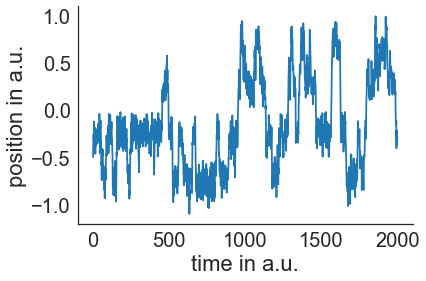

In [28]:
# Here we just plot the timeseries of the 1-D browninan dynamics trajectory
plt.plot(traj[:2000])
#ylim(-1.2,1.2)
xlabel('time in a.u.')
ylabel('position in a.u.')
sbn.despine()

## What happens if we tune the lagime?

In [31]:
#markov model stuff
model = mm.msm.estimate_markov_model(dtrajs, 5)
T = model.transition_matrix
vec = model.eigenvectors_left()

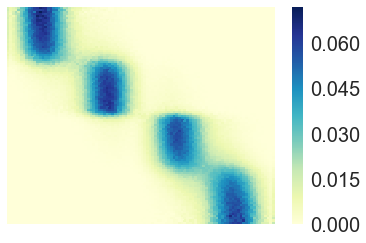

In [32]:
sbn.heatmap(T,xticklabels=False, yticklabels=False, cmap="YlGnBu")

In [ ]:
#Let's plot the first left eigenvector

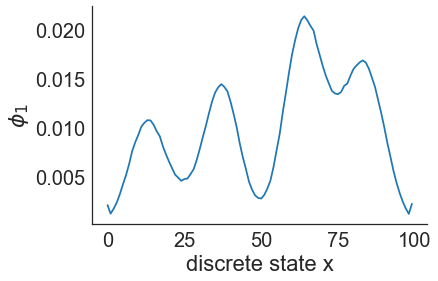

In [33]:
plt.plot(vec[0,:])
xlabel('discrete state x')
ylabel(r'$\phi_1$')
sbn.despine()

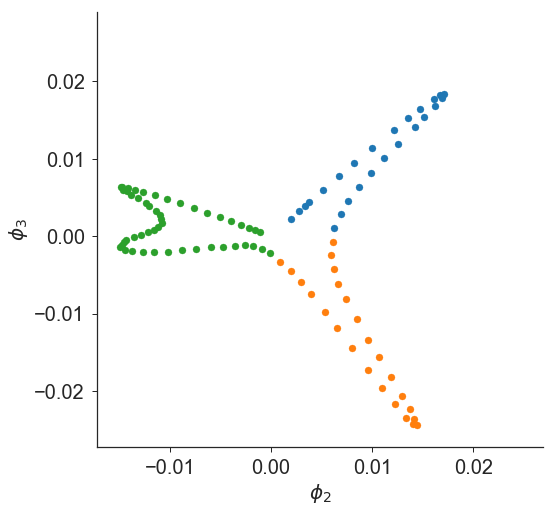

In [34]:
fig = figure(figsize=(8, 8))
plot = fig.add_subplot(111)
plt.scatter(np.real(vec[1,:25]),np.real(vec[2,:25]), color=colors[0])
plt.scatter(np.real(vec[1,25:50]),np.real(vec[2,25:50]), color=colors[1])
plt.scatter(np.real(vec[1,50:-1]),np.real(vec[2,50:-1]), color=colors[2])
plt.xlabel (r'$\phi_2$', fontsize = 20)
plt.ylabel (r'$\phi_3$', fontsize = 20)
#plt.xticks(np.linspace(-0.20, 0.20,5))
#plt.yticks(np.linspace(-0.3, 0.2,6))
plot.tick_params(axis='both', which='major', length=5)
sbn.despine()


In [ ]:
fig = figure(figsize=(8, 2))
plot = fig.add_subplot(111)
plt.plot(centers[0:25],np.real(vec[1,0:25]), color=colors[0], linewidth = 2)
plt.plot(centers[24:50],np.real(vec[1,24:50]), color=colors[0], linewidth = 2)
plt.plot(centers[49:],np.real(vec[1,49:]), color=colors[2], linewidth = 2)

plt.plot(centers[:], np.zeros(centers.shape[0]),'--', linewidth = 2,  color = 'gray')
plt.ylabel(r'$\phi_2$', fontsize = 25)
plt.xlabel('x in a.u.')
plt.xlim(-1, 1)
plot.tick_params(axis='both', which='major', length=5)
sbn.despine()

In [ ]:
fig = figure(figsize=(8, 2))
plot = fig.add_subplot(111)
plt.plot(centers[0:25],np.real(vec[2,0:25]), color=colors[0], linewidth = 2)
plt.plot(centers[24:50],np.real(vec[2,24:50]), color=colors[1], linewidth = 2)
plt.plot(centers[49:-1],np.real(vec[2,49:-1]), color=colors[2], linewidth = 2)

plt.plot(centers[:], np.zeros(centers.shape[0]),'--', linewidth = 2,  color = 'gray')
plt.ylabel(r'$\phi_3$', fontsize = 25)
plt.xlabel('x in a.u.')
plt.xlim(-1, 1)
plot.tick_params(axis='both', which='major', length=5)
sbn.despine()

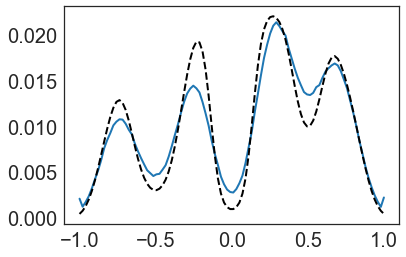

In [35]:
#plotting the first eigenvector
plt.plot(centers,np.real(vec[0,:]), color=colors[0], linewidth = 2)

p= []
def integ(x, kt):
    return np.exp(- U(x)/kt)
for x in centers:
    p.append(integ(x,1.0))
p = np.array(p)
p = p/p.sum()
plt.plot(centers,p, '--',color = 'k', linewidth=2)

In [36]:
its = mm.msm.timescales_msm(dtrajs, lags=100, nits=10, errors='bayes', n_jobs=-1)

In [37]:
import pyemma.plots as mplt
#figure(figsize(8,2))
#matplotlib.rcParams.update({'font.size': 14})
#mplt.plot_implied_timescales(its, show_mean=False, ylog=False,  units='steps', linewidth=2)
#sbn.despine()

In [38]:
timescale = its.get_timescales()
std = its.get_sample_std()
#x = np.linspace(0,11,11)
x =its.lagtimes

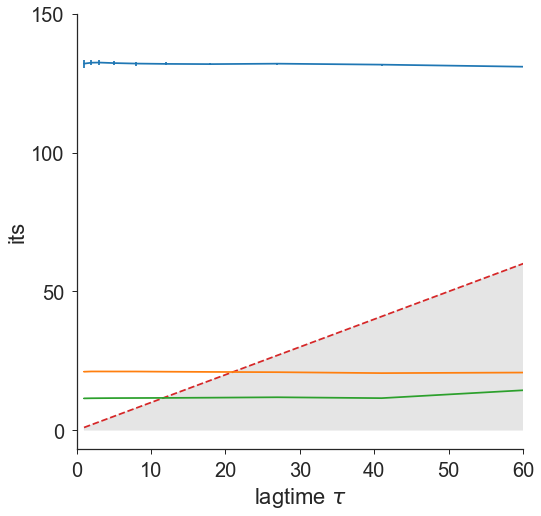

In [39]:
plt.figure(figsize(8,8))
plt.errorbar(x,timescale[:,0],yerr=std[:,0])
plt.errorbar(x,timescale[:,1],yerr=std[:,1] )
plt.errorbar(x,timescale[:,2],yerr=std[:,2])
plt.plot(x,x, '--')
plt.fill_between(x,x, color='gray', alpha=0.2 )
plt.xlim(0,60)
sbn.despine()
plt.yticks([0, 50, 100, 150])
plt.xlabel(r'lagtime $\tau$')
plt.ylabel(r'its')
plt.tick_params(axis='both', which='major',length=5)

In [40]:
hmm = model.coarse_grain(4)

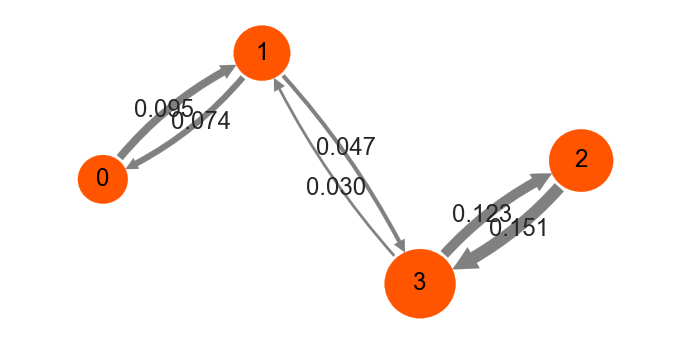

In [41]:
mplt.plot_markov_model(hmm, minflux=4e-4, arrow_label_format='%.3f')
gca().set_frame_on(False)

In [ ]:
plt.plot(model.eigenvalues(), marker = 'o', lw=0)
xlim(0,6)
xlabel('index')
ylabel('eigenvalue')
sbn.despine()